In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv


In [1]:
#Libraries to Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
#1.Import and Preprocess the Dataset


# Load dataset
df = pd.read_csv('/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv')

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows/columns or fill missing values if any
df = df.dropna()

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [16]:
#2.Simple Linear Regression
# Select feature and target
X = df[['Area']]
y = df['Price']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
# Print first 5 predicted vs actual values
print("Predicted prices:", y_pred[:5])
print("Actual prices:", y_test.values[:5])







Predicted prices: [536577.29535447 535984.71121625 536399.86944898 536380.1963175
 536222.25968246]
Actual prices: [514764 694256  66375 650243 223285]


In [18]:
#another simple linear regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Example dataset: [bedrooms, bathrooms]
X = np.array([
    [2, 1],
    [3, 2],
    [4, 3],
    [3, 2],
    [5, 4]
])

# Target variable: price (in lakhs)
y = np.array([50, 70, 90, 75, 110])

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Predict price for a house with 3 bedrooms and 2 bathrooms
prediction = model.predict([[3, 2]])
print("Predicted price:", prediction[0])

Intercept: 22.115384615384627
Coefficients: [9.80769231 9.80769231]
Predicted price: 71.15384615384616


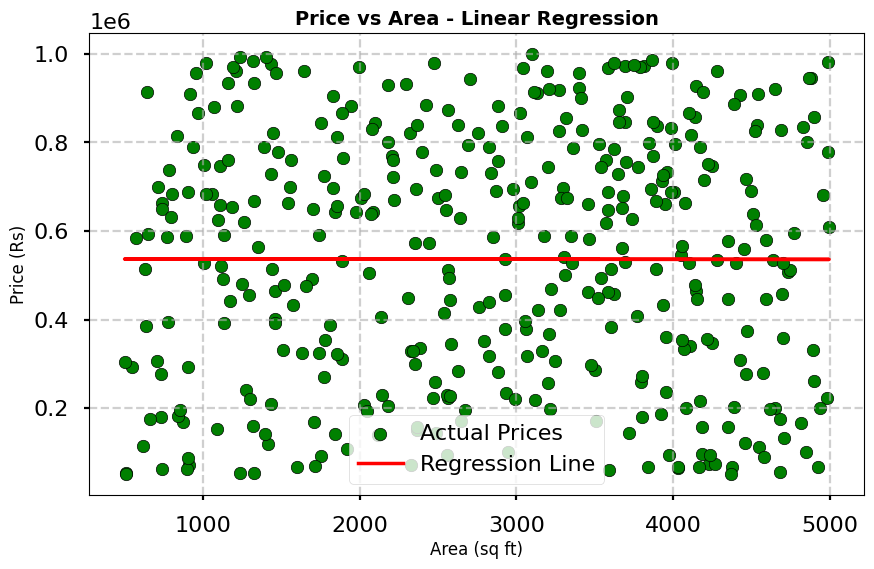

Mean Absolute Error (MAE): 242478.32249473498
Mean Squared Error (MSE): 77856127383.17978
R² Score: -0.0007365003351658128
Coefficient (Slope): [-0.18386104]
Intercept: 536693.6793940249


In [13]:
#3.plot regression line

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', edgecolor='black', s=80, label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2.5, label='Regression Line')
plt.title('Price vs Area - Linear Regression', fontsize=14, fontweight='bold')
plt.xlabel('Area (sq ft)', fontsize=12)
plt.ylabel('Price (Rs)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Coefficient (Slope):", model.coef_)
print("Intercept:", model.intercept_)

In [17]:
#4. Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation Metrics")
print("----------------------------")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.4f}")
print()

 Model Evaluation Metrics
----------------------------
 Mean Absolute Error (MAE): 242478.32
 Mean Squared Error (MSE): 77856127383.18
 R² Score: -0.0007



In [15]:
# 5. Multiple Linear Regression

# Select multiple features
X_multi = df[['Area', 'Bedrooms', 'Bathrooms']]
y_multi = df['Price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predict
y_pred_multi = multi_model.predict(X_test)

# Evaluation
print("Multiple Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R²:", r2_score(y_test, y_pred_multi))

print("Coefficients:", multi_model.coef_)
print("Intercept:", multi_model.intercept_)


Multiple Linear Regression:
MAE: 243756.47976825116
MSE: 78440549944.81049
R²: -0.008248471565956317
Coefficients: [-9.54095578e-02 -1.32595377e+01 -9.75966118e+03]
Intercept: 561284.0391500255
